# Trabajo Practico N° 2

## Regresion

Inteligencia Artificial 2023 - Universidad de Mendoza - Sede San Rafael
Alumno: Lucas Galdame Villegas

## Modelo de Regresion Lineal Simple

### 1. Carga del Dataset

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [200]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2023-09-12 06:26:25--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2023-09-12 06:26:25 (4.57 MB/s) - ‘insurance.csv.3’ saved [54288/54288]



In [201]:
import pandas as pd
data = pd.read_csv('/content/insurance.csv')

In [202]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [203]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. Eliminar variables no numericas

<Axes: >

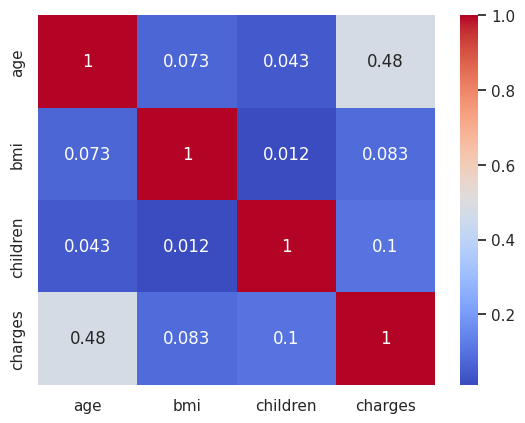

In [205]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True)

### 3. Elegir variables

In [206]:
X = data['age'].to_numpy()
Y = data['bmi'].to_numpy()

In [207]:
print(f"X ('age') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)} | 5 ejemplos se ven así: {X[:5]}\n")
print(f"Y ('bmi') tiene la forma: {Y.shape} | posee cantidad de datos: {len(Y)} | 5 ejemplos se ven así: {Y[:5]}")

X ('age') tiene la forma: (1338,) | posee cantidad de datos: 1338 | 5 ejemplos se ven así: [19 18 28 33 32]

Y ('bmi') tiene la forma: (1338,) | posee cantidad de datos: 1338 | 5 ejemplos se ven así: [27.9   33.77  33.    22.705 28.88 ]


### 4. Analizar dataset

Para esto analizaremos las siguientes características:

1. Normalidad de los datos.
2. Como se distribuyen.
3. Correlación

In [208]:
# Normalidad la calculamos usando el test de Shapiro-Wilk
from scipy.stats import shapiro
normalidad_X = shapiro(X) #evaluamos normalidad de los datos de X
normalidad_Y = shapiro(Y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X: {normalidad_X}")
print(f"Normalidad de Y: {normalidad_Y}")

Normalidad de X: ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
Normalidad de Y: ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)


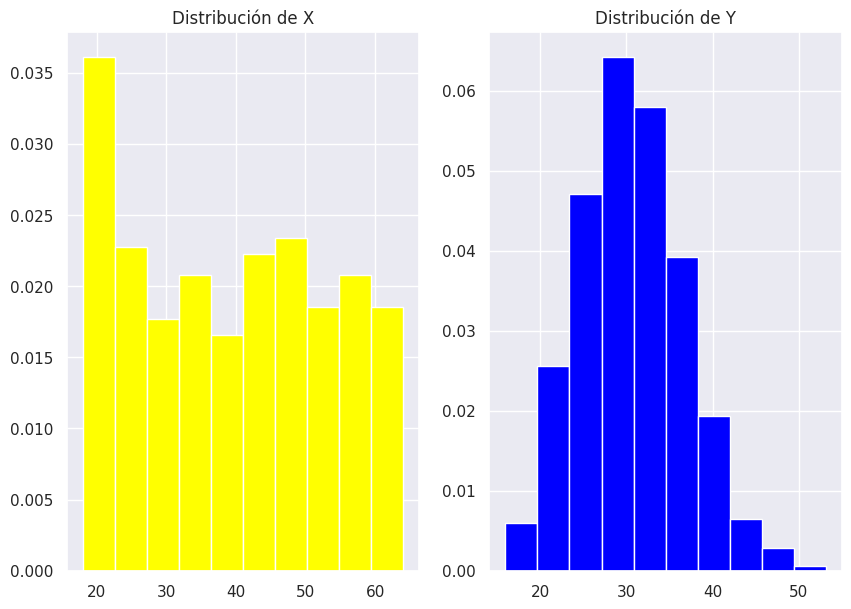

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(X,color='yellow',density=True)
plt.title("Distribución de X")
plt.subplot(1,2,2)
plt.hist(Y,color='blue',density=True)
plt.title("Distribución de Y");

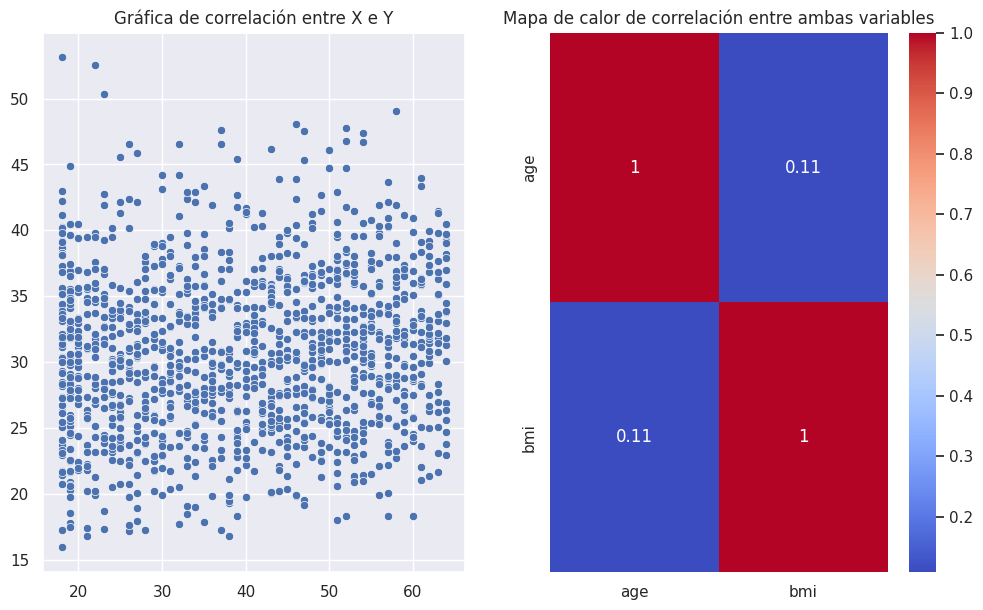

In [210]:
#Vemos si se correlacionan para eso podemos hacer una gráfica de scatter plot o un mapa de calor o un pairplot
#Hacemos primero un scatterplot con un mapa de calor

import seaborn as sns
sns.set()

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X, y=Y)
plt.title("Gráfica de correlación entre X e Y")
plt.subplot(1,2,2)
sns.heatmap(data[["age","bmi"]].corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

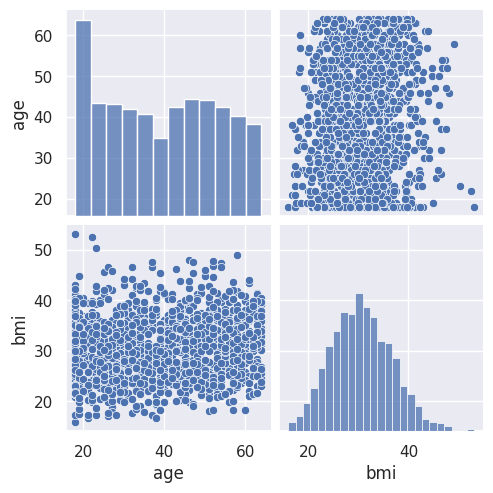

In [211]:
#Luego hacemos un pairplot
sns.pairplot(data[["age","bmi"]]);

### 5. Separar dataset en train y test

In [212]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

In [213]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003,) | ytrain shape (1003,)
Xtest shape: (335,) | ytest shape (335,)


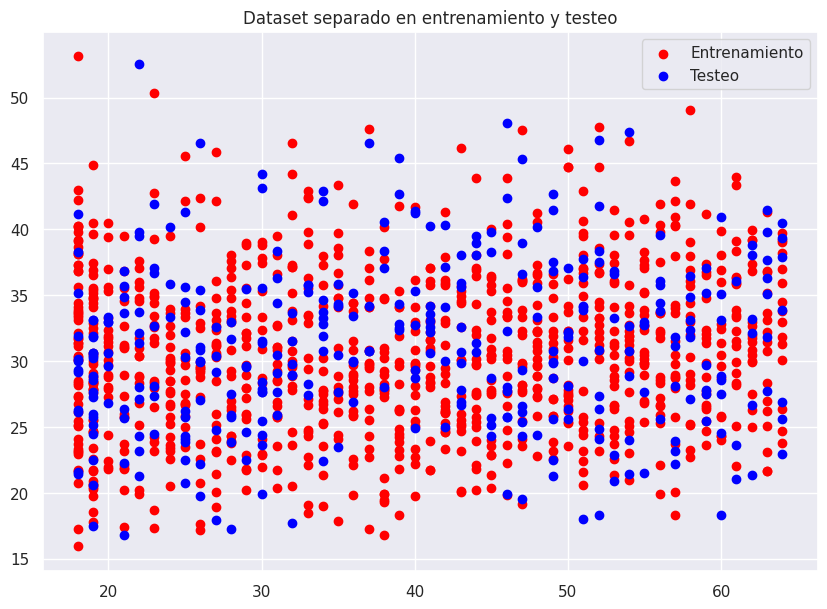

In [214]:
#Vemos gráficamente como queda el dataset separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='red',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='blue',label='Testeo')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo");

### 6. Entrenar modelo

In [215]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1)) #entrenamos el modelo con la función .fit()

LinearRegression()

In [216]:
#Vemos el coefficiente e intercepto que "aprendió" el modelo que mejor se ajustan a la relación lineal
print(f"Coeficiente que acompaña a la variable de entrada: {linear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {linear_model.intercept_}")

Coeficiente que acompaña a la variable de entrada: [[0.04768185]]
Intercepto que corta al eje de ordenadas: [28.64001759]


El modelo final quedaría así:

`y = 0.04768185*X0 + 28.64001759`


### 7. Evaluar modelo entrenado

In [217]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {linear_model.score(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))}")
print(f"Valor de métrica R2 con el conjunto de testeo: {linear_model.score(Xtest.reshape(-1, 1),ytest.reshape(-1, 1))}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.012393305915668451
Valor de métrica R2 con el conjunto de testeo: 0.001557360482753234


In [218]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_pred = linear_model.predict(Xtest.reshape(-1, 1)).squeeze() #la función squeeze() es para quitar dimensiones extras, ej: (12,1) -> (12,) ya que las dimensiones extras solo sirven para entrenar
y_train_pred = linear_model.predict(Xtrain.reshape(-1, 1)).squeeze()
y_test_pred.shape, y_train_pred.shape

((335,), (1003,))

In [219]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mse entre ytrain vs y_train_pred

print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.043528201929191
Valor de métrica MAE con el conjunto de entrenamiento: 4.795776790873554

Valor de métrica MSE con el conjunto de testeo: 39.932773379922494
Valor de métrica MSE con el conjunto de entrenamiento: 35.67373816117116


In [224]:
#Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {Y.max()} | Price minimo: {Y.min()} | Price promedio: {Y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 53.13 | Price minimo: 15.96 | Price promedio: 30.66339686098655 | Varianza de los datos de entrada X: 197.2538519888909


In [226]:
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

25.175 vs 30.79 --> diferencia = -5.61 --> error: -19.86%
30.02 vs 30.36 --> diferencia = -0.34 --> error: 0.00%
26.885 vs 31.69 --> diferencia = -4.81 --> error: -14.88%
25.745 vs 30.83 --> diferencia = -5.09 --> error: -19.42%
31.92 vs 29.55 --> diferencia = 2.37 --> error: 6.27%
42.9 vs 30.26 --> diferencia = 12.64 --> error: 27.97%
22.515 vs 29.55 --> diferencia = -7.03 --> error: -31.09%
37.905 vs 31.69 --> diferencia = 6.21 --> error: 15.83%
17.29 vs 29.98 --> diferencia = -12.69 --> error: -69.40%
28.69 vs 30.98 --> diferencia = -2.29 --> error: -6.97%
24.4 vs 30.07 --> diferencia = -5.67 --> error: -20.49%
30.59 vs 30.59 --> diferencia = -0.00 --> error: 0.00%
29.59 vs 30.02 --> diferencia = -0.43 --> error: 0.00%
42.35 vs 30.83 --> diferencia = 11.52 --> error: 25.97%
40.92 vs 31.50 --> diferencia = 9.42 --> error: 21.99%
38.94 vs 30.88 --> diferencia = 8.06 --> error: 20.54%
42.68 vs 30.98 --> diferencia = 11.70 --> error: 25.77%
36.63 vs 30.88 --> diferencia = 5.75 --> error

In [227]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 15.40%




---



## Modelo de Regresion Lineal Multivariable

### 1. Carga del Dataset

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
from scipy.stats import shapiro
import seaborn as sns
sns.set()

In [229]:
data = pd.read_csv('insurance.csv')
data.head(5) #visualizamos los primeros 5 registros

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. Eliminar variables no numericas

<Axes: >

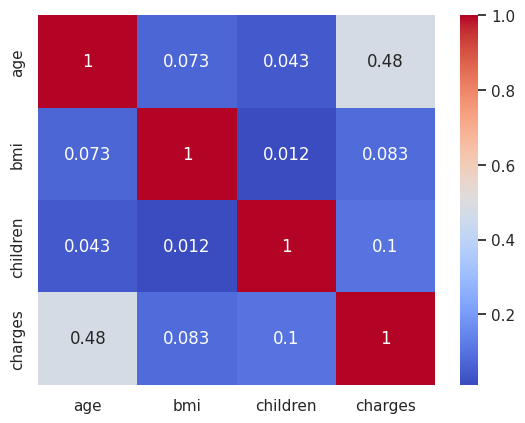

In [231]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True)

### 3. Elegir variables

In [232]:
X = data[['age','bmi']].to_numpy()
Y = data['charges'].to_numpy()

In [233]:
print(f"X ('age','bmi') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)}\nAlgunos ejemplos se ven así:\n{X[:5]}")
print(f"\nY ('charges') tiene la forma: {Y.shape} | posee cantidad de datos: {len(Y)}\n5 ejemplos se ven así: {Y[:5]}")

X ('age','bmi') tiene la forma: (1338, 2) | posee cantidad de datos: 1338
Algunos ejemplos se ven así:
[[19.    27.9  ]
 [18.    33.77 ]
 [28.    33.   ]
 [33.    22.705]
 [32.    28.88 ]]

Y ('charges') tiene la forma: (1338,) | posee cantidad de datos: 1338
5 ejemplos se ven así: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


### 4. Analizar el dataset

Para esto analizaremos las siguientes características:

1. Normalidad de los datos.
2. Como se distribuyen.
3. Correlación

In [234]:
#Normalidad la calculamos usando el test de Shapiro-Wilk
normalidad_X_area = shapiro(X[:,0]) #evaluamos normalidad de los datos de X ('area')
normalidad_X_rooms = shapiro(X[:,1]) #evaluamos normalidad de los datos de X ('rooms')
normalidad_y = shapiro(Y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X_area: {normalidad_X_area}")
print(f"Normalidad de X_rooms: {normalidad_X_rooms}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X_area: ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
Normalidad de X_rooms: ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
Normalidad de y: ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)


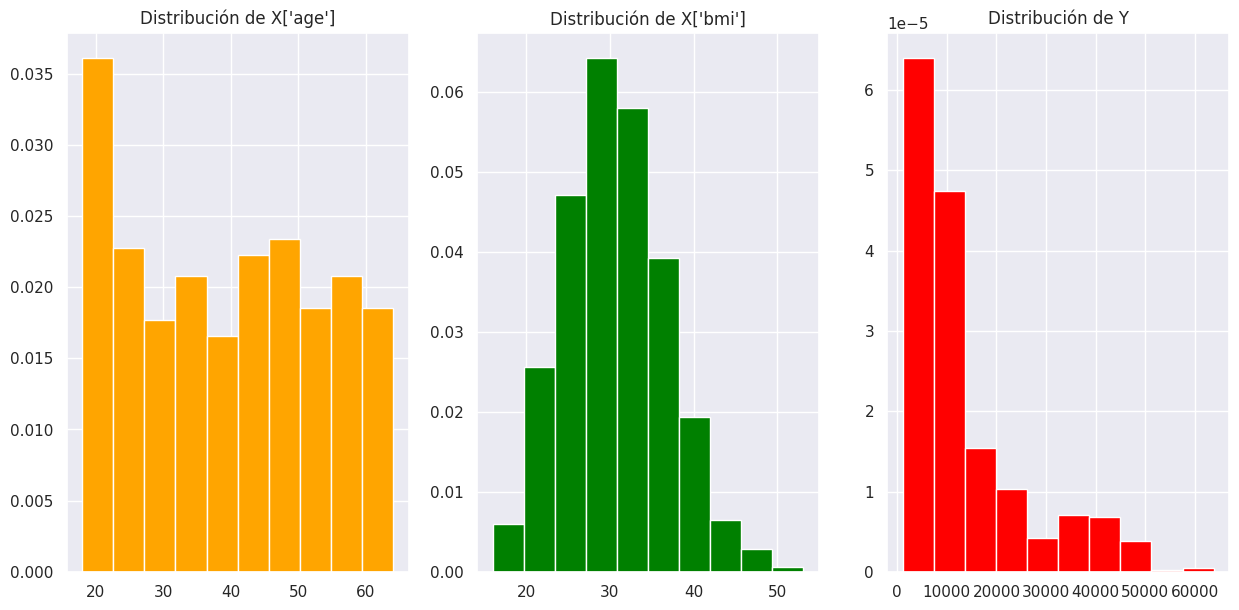

In [235]:
#Vemos como se distribuyen ambos conjuntos de datos X e Y
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X[:,0],color='orange',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,3,2)
plt.hist(X[:,1],color='green',density=True)
plt.title("Distribución de X['bmi']")
plt.subplot(1,3,3)
plt.hist(Y,color='red',density=True)
plt.title("Distribución de Y");

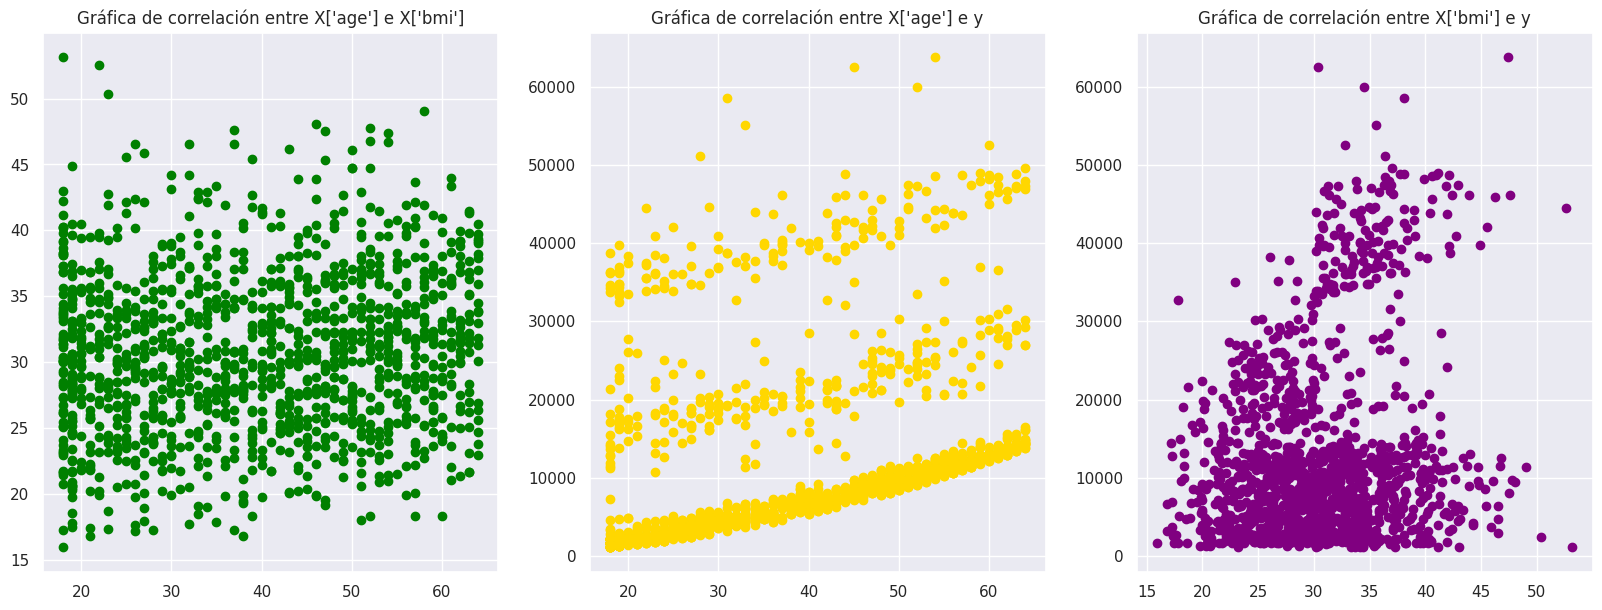

In [236]:
#Aqui veremos si hay correlacion mediante un scatterplot
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['age'] e X['bmi']")
plt.subplot(1,3,2)
plt.scatter(X[:,0],Y,color='gold')
plt.title("Gráfica de correlación entre X['age'] e y")
plt.subplot(1,3,3)
plt.scatter(X[:,1],Y,color='purple')
plt.title("Gráfica de correlación entre X['bmi'] e y");

<ipython-input-237-744c86328d71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(columns=['children']).corr(method='kendall'), cmap='coolwarm', annot=True)


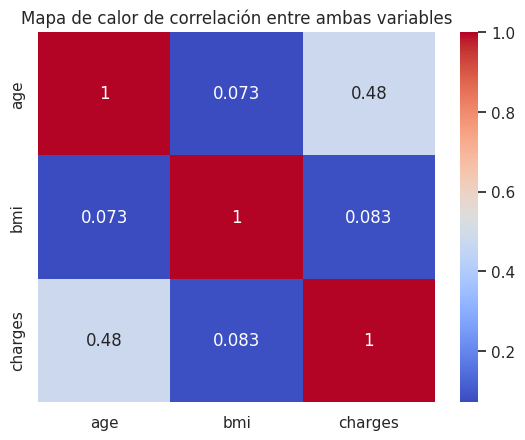

In [237]:
sns.heatmap(data.drop(columns=['children']).corr(method='kendall'), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

### 5. Transformar datos

En orden de escalar los datos dentro de un mismo rango de valores, conservando su propia distribución, podemos hacerlo con `StandarScaler` o `MinMaxScale` , ambos de Scikit-Learn.

In [238]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [239]:
X.shape

(1338, 2)

In [240]:
X_transformed = scaler.fit_transform(X) #escalamos los datos de entrada X con la función .fit_transform()
print(f"X_transformed: {X_transformed.shape}")

X_transformed: (1338, 2)


In [241]:
#ploteamos como se ven 5 ejemplos de datos normales vs escalados
print(f"X original: {X[:5]}\n")
print(f"X transformed: {X_transformed[:5]}")

X original: [[19.    27.9  ]
 [18.    33.77 ]
 [28.    33.   ]
 [33.    22.705]
 [32.    28.88 ]]

X transformed: [[0.02173913 0.3212268 ]
 [0.         0.47914985]
 [0.2173913  0.45843422]
 [0.32608696 0.18146355]
 [0.30434783 0.34759214]]


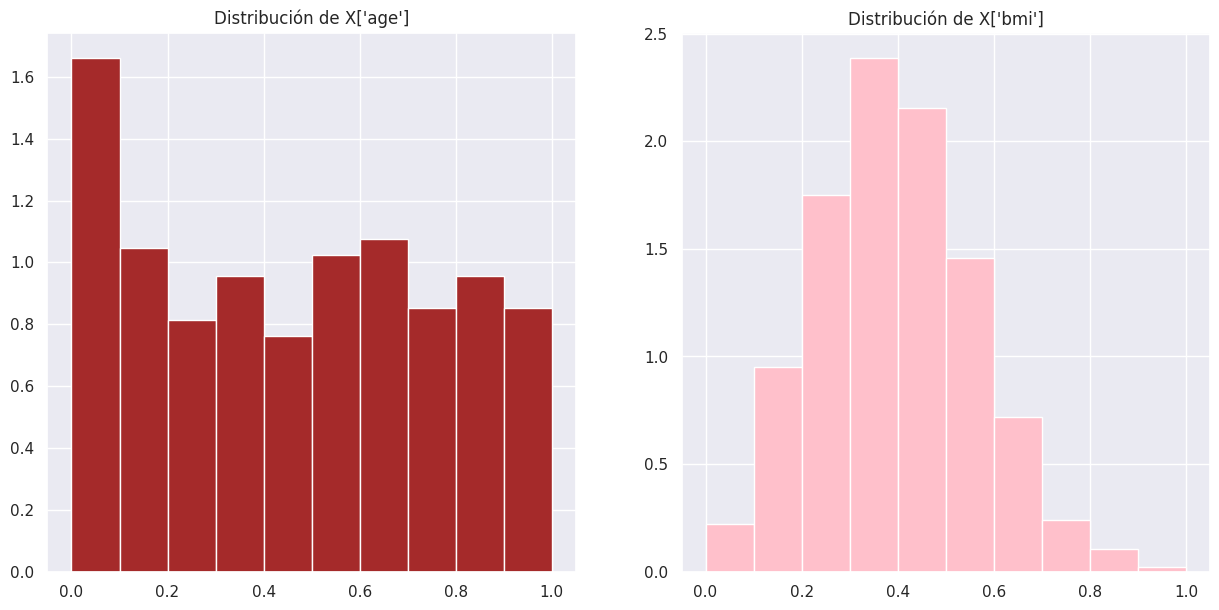

In [242]:
#Vemos como se distribuyen los valores de X_transformed
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(X_transformed[:,0],color='brown',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,2,2)
plt.hist(X_transformed[:,1],color='pink',density=True)
plt.title("Distribución de X['bmi']");

### 6. Separar dataset en train y test

In [243]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, Y, test_size=0.25, random_state=42)

In [244]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003, 2) | ytrain shape (1003,)
Xtest shape: (335, 2) | ytest shape (335,)


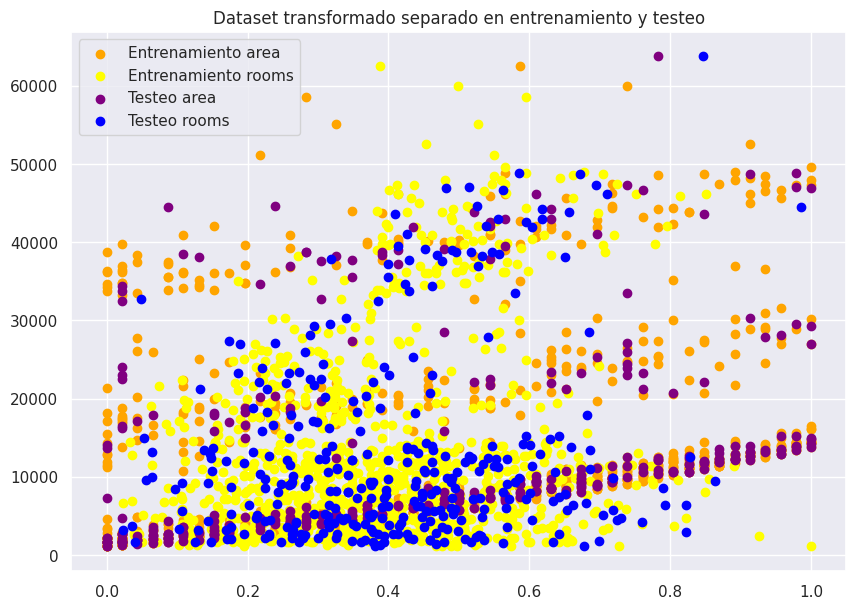

In [245]:
#Vemos gráficamente como queda el dataset transformador separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento area')
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento rooms')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo area')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo rooms')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

### 7. Entrenar modelo

In [246]:
#Instanciamos el modelo
multilinear_model = LinearRegression()
multilinear_model.fit(Xtrain,ytrain)

LinearRegression()

In [247]:
#Vemos los coefficientes que "aprendió" o "encontró" el modelo que mejor se ajustan a la relación multiple
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [10860.58595323 12307.33053626]
Intercepto que corta al eje de ordenadas: 3431.352752725019


El modelo final quedaría así:

`y = 10860.58595323*X0 -12307.33053626*X1 + 3431.352752725019`

### 8. Evaluar el modelo entrenado

In [248]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.11305926620508677
Valor de métrica R2 con el conjunto de testeo: 0.1288347843390777


In [249]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = multilinear_model.predict(Xtest)
y_train_m_pred = multilinear_model.predict(Xtrain)
y_test_m_pred.shape, y_train_m_pred.shape

((335,), (1003,))

In [250]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mse entre ytrain vs y_train_pred

print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 9188.007558155272
Valor de métrica MAE con el conjunto de entrenamiento: 9000.325577239742

Valor de métrica MSE con el conjunto de testeo: 131451112.26204939
Valor de métrica MSE con el conjunto de entrenamiento: 128686580.36043614


In [251]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {Y.max()} | Price minimo: {Y.min()} | Price promedio: {Y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 63770.42801 | Price minimo: 1121.8739 | Price promedio: 13270.422265141257 | Varianza de los datos de entrada X: 135.45536818225267


In [252]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 12857.22 --> diferencia = -3762.15 --> error: -41.36%
5272.1758 vs 12336.54 --> diferencia = -7064.37 --> error: -133.99%
29330.98315 vs 17909.31 --> diferencia = 11421.68 --> error: 38.94%
9301.89355 vs 13282.05 --> diferencia = -3980.15 --> error: -42.79%
33750.2918 vs 8951.96 --> diferencia = 24798.34 --> error: 73.47%
4536.259 vs 16129.03 --> diferencia = -11592.77 --> error: -255.54%
2117.33885 vs 5837.87 --> diferencia = -3720.53 --> error: -175.69%
14210.53595 vs 21558.13 --> diferencia = -7347.60 --> error: -51.70%
3732.6251 vs 6232.72 --> diferencia = -2500.10 --> error: -66.98%
10264.4421 vs 14965.46 --> diferencia = -4701.02 --> error: -45.80%
18259.216 vs 9059.11 --> diferencia = 9200.10 --> error: 50.39%
7256.7231 vs 13705.77 --> diferencia = -6449.05 --> error: -88.87%
3947.4131 vs 10541.47 --> diferencia = -6594.06 --> error: -167.05%
46151.1245 vs 18780.12 --> diferencia = 27371.01 --> error: 59.31%
48673.5588 vs 21612.03 --> diferencia = 27061.53 --> erro

In [253]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 120.63%


## Modelo de Support Vector Regressor

### 1. Cargar dataset

In [254]:
data = pd.read_csv('insurance.csv')

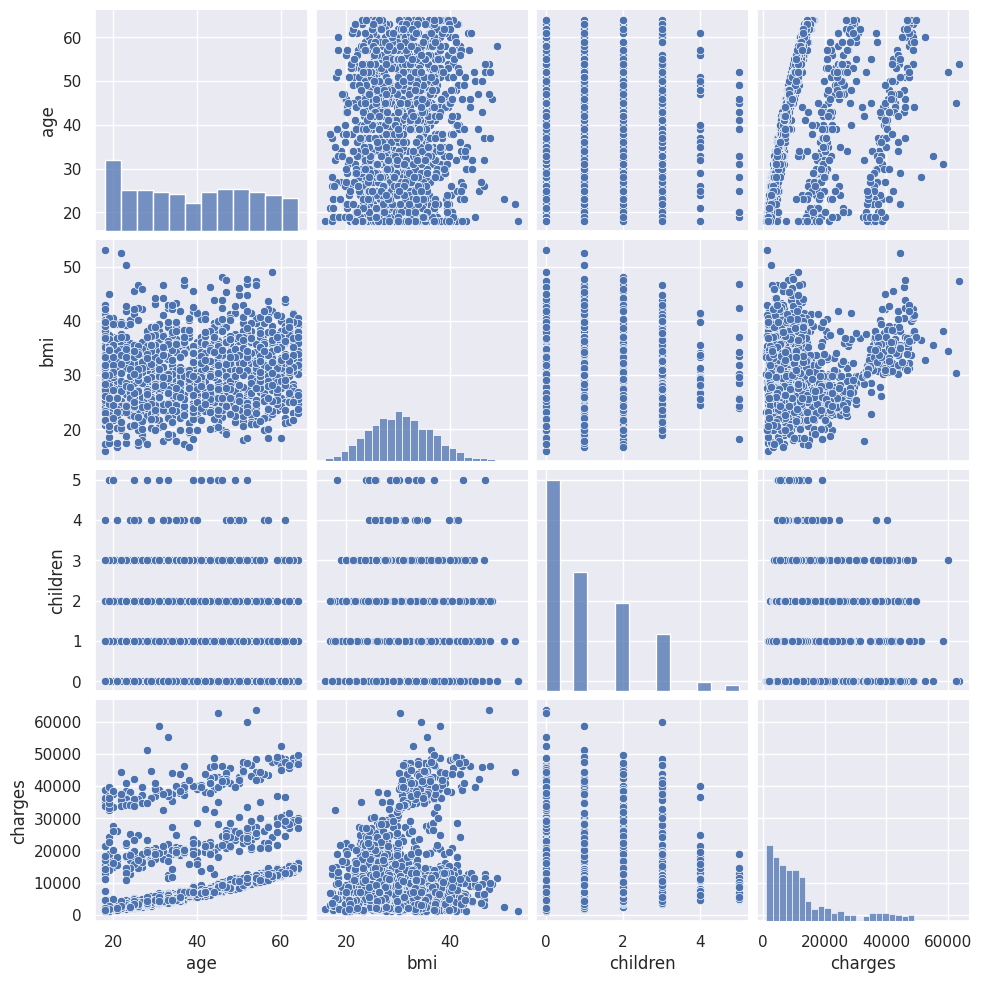

In [255]:
sns.pairplot(data.drop(columns=['sex','smoker','region']));

### 2. Evaluar dataset

In [256]:
from scipy.stats import shapiro
for i in data.drop(columns=['sex', 'smoker', 'region']):
  print(i, '->', shapiro(data[i]))

age -> ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
bmi -> ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
children -> ShapiroResult(statistic=0.8231810331344604, pvalue=5.06690727121734e-36)
charges -> ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)


<Axes: >

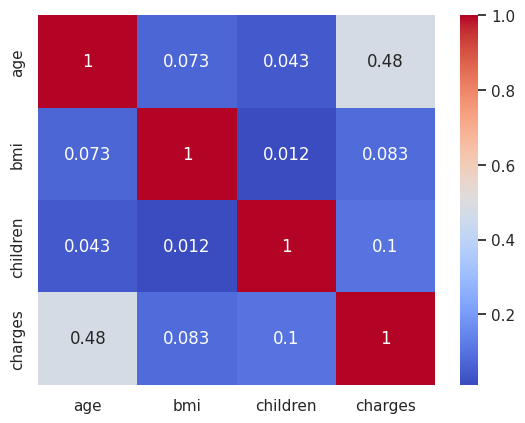

In [257]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True)

In [258]:
X = data[['charges', 'children', 'bmi']].to_numpy()
Y = data['age'].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

In [259]:
from sklearn.svm import SVR
svr = SVR(C=6.5,epsilon=0.5,degree=1)
svr.fit(Xtrain,ytrain)

SVR(C=6.5, degree=1, epsilon=0.5)

In [260]:
#Vemos los mejores parámetros de SVM
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 3. Evaluar SMV

In [261]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {svr.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {svr.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.4903809577893522
Valor de métrica R2 con el conjunto de testeo: 0.5032498199643038


In [262]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_svr_pred = svr.predict(Xtest)
y_train_svr_pred = svr.predict(Xtrain)
y_test_svr_pred.shape, y_train_svr_pred.shape

((335,), (1003,))

In [266]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mse entre ytrain vs y_train_pred

print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.655089265174242
Valor de métrica MAE con el conjunto de entrenamiento: 5.955793480643334

Valor de métrica MSE con el conjunto de testeo: 98.4984187414841
Valor de métrica MSE con el conjunto de entrenamiento: 100.34396909761773


In [267]:
#Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

45 vs 48.78 --> diferencia = -3.78 --> error: -6.67%
36 vs 34.32 --> diferencia = 1.68 --> error: 2.78%
64 vs 29.35 --> diferencia = 34.65 --> error: 53.12%
46 vs 49.40 --> diferencia = -3.40 --> error: -6.52%
19 vs 28.74 --> diferencia = -9.74 --> error: -47.37%
34 vs 31.16 --> diferencia = 2.84 --> error: 5.88%
19 vs 21.02 --> diferencia = -2.02 --> error: -10.53%
64 vs 56.51 --> diferencia = 7.49 --> error: 10.94%
28 vs 27.71 --> diferencia = 0.29 --> error: 0.00%
49 vs 51.95 --> diferencia = -2.95 --> error: -4.08%
30 vs 51.97 --> diferencia = -21.97 --> error: -70.00%
41 vs 42.43 --> diferencia = -1.43 --> error: -2.44%
29 vs 28.63 --> diferencia = 0.37 --> error: 0.00%
46 vs 53.77 --> diferencia = -7.77 --> error: -15.22%
60 vs 57.82 --> diferencia = 2.18 --> error: 3.33%
47 vs 49.47 --> diferencia = -2.47 --> error: -4.26%
49 vs 50.79 --> diferencia = -1.79 --> error: -2.04%
47 vs 46.43 --> diferencia = 0.57 --> error: 0.00%
46 vs 45.98 --> diferencia = 0.02 --> error: 0.00%
43 

In [268]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 16.75%
